In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [3]:
filepath = "/content/drive/MyDrive/Datasets/Network_traffic/KaggleData.csv"
df = pd.read_csv(filepath)

In [4]:
feats_importance = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [5]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [6]:
dummy_y = np_utils.to_categorical(Y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.3, random_state = 42)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [10]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [11]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',keras.metrics.Precision(), keras.metrics.Recall(), get_f1])

In [13]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
5457/5457 [==============================] - 29s 5ms/step - loss: 0.4383 - acc: 0.8481 - precision: 0.8967 - recall: 0.8043 - get_f1: 0.8415 - val_loss: 0.2600 - val_acc: 0.9181 - val_precision: 0.9350 - val_recall: 0.9044 - val_get_f1: 0.9193
Epoch 2/10
5457/5457 [==============================] - 27s 5ms/step - loss: 0.2204 - acc: 0.9222 - precision: 0.9304 - recall: 0.9146 - get_f1: 0.9223 - val_loss: 0.2648 - val_acc: 0.8920 - val_precision: 0.8992 - val_recall: 0.8844 - val_get_f1: 0.8917
Epoch 3/10
5457/5457 [==============================] - 26s 5ms/step - loss: 0.1720 - acc: 0.9405 - precision: 0.9449 - recall: 0.9358 - get_f1: 0.9403 - val_loss: 0.1351 - val_acc: 0.9523 - val_precision: 0.9559 - val_recall: 0.9488 - val_get_f1: 0.9523
Epoch 4/10
5457/5457 [==============================] - 31s 6ms/step - loss: 0.1477 - acc: 0.9481 - precision: 0.9514 - recall: 0.9451 - get_f1: 0.9482 - val_loss: 0.1276 - val_acc: 0.9599 - val_precision: 0.9632 - val_recall: 0.9569 -

In [14]:
%%time
loss, accuracy, precision, recall, f1 = model.evaluate(X_test, y_test, verbose=2)

4678/4678 - 6s - loss: 0.0668 - acc: 0.9796 - precision: 0.9808 - recall: 0.9784 - get_f1: 0.9795 - 6s/epoch - 1ms/step
CPU times: user 7.81 s, sys: 408 ms, total: 8.22 s
Wall time: 6.63 s


In [15]:
print("Accuracy:")
print(accuracy)
print("Precsion:")
print(precision)
print("Recall:")
print(recall)
print("F1:")
print(f1)

Accuracy:
0.9795892238616943
Precsion:
0.9807522296905518
Recall:
0.9783933162689209
F1:
0.9795424938201904


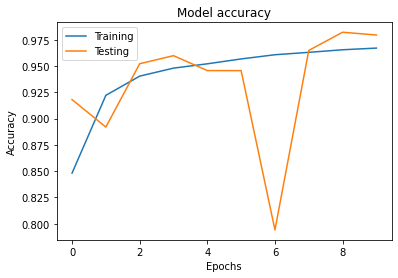

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.savefig("/content/Accuracy_img.png")

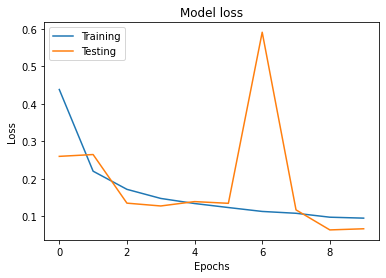

In [19]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['Training', 'Testing'], loc='upper left') 
plt.savefig("Loss_img.png")